Using Minecraft Player's Age and Experience To Predict Contribution Levels.

Background

Minecraft is a sandbox game created by Swedish developer Markus "Notch" Persson in 2011 (cite), with the intention of allowing players to build, explore, and interact in their own unique open world. Minecraft has amassed millions of players across the globe, with 200 million monthly players as of April 2025 (cite). With millions of players, Minecraft gives the opportunities for collaborative servers, where people can contribute to group builds, community projects, and different game challenges. However, like most collaborative environments, the level of contribution may vary from player to player. Some may dedicate a significant amount of time to do activities such as mining and building, while others may play casually due to time constraints. On a Minecraft forum, players reported that they tend to play for an hour or two a day on the weekdays, then spend about 3+ hours on weekends if possible.

The unequal distribution of work raises the question: can we predict whether a person is likel to be a high contributor in a Minecraft server based on age and experience?

To investigate this question, the dataset, players.csv (cite), was analyzed. The dataset includes variables such as age, experience level, and total hours played.

Commonly used variable mentioned in this report includes:

Age: Player's age in years,
Experience: Reported skill level, categorized as:
Amateur - 1
Beginner - 2
Regular - 3
Pro - 4
Veteran - 5
Gender: Self-identified gender, categorized as:
Male - 1
Female - 2 
Others - 3
High Contributor: An variable indicating whether a player has more than 2 hours on the server.

Methods

Before conducting any analysis, the dataset must be loaded and cleaned. This includes selecting relevant variables, such as age, experience, and total hours, and converting them into the appropriate data type. Additionally, a new variable must be created to indicate whether a player significantly contributed to the server. Following data preparation, an exploratory analysis will be conducted. The dataset will be split into training and testing data to help support the evaluation of a predictive model. Also, a scatterplot will be created to examine relationship between age, experience, and contribution. Next, a K-Nearest Neighbors classification model will be created to predict high contributors by finding the optimal K value and assessing the accuracy.

In [1]:
#Loading packages
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Load in data and convert column names to lowercase to create a uniform title
players <- read_csv("data/players.csv") |> 
    rename_with(tolower)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedemail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [3]:
#Clean up data
#Create new column called high_contributor based on the total hours player. If it is over 2 hours, players are considered high contributors.
#Assign numbers to experience level to simplfy data analysis.
#Select relevant columns and drop any NA in data.
mc_data <- players |> 
    mutate(high_contributor = factor(played_hours < 2, labels = c("yes", "no")),
    experience_num = case_when(experience == "Amateur" ~ 1, experience== "Beginner" ~ 2, experience == "Regular" ~ 3, experience == "Pro" ~ 4, experience == "Veteran" ~ 5)) |>
    select(age, high_contributor, experience_num) |>
    drop_na()
mc_data

age,high_contributor,experience_num
<dbl>,<fct>,<dbl>
9,yes,4
17,yes,5
17,no,5
21,no,1
21,no,3
17,no,1
19,no,3
21,no,1
17,no,1


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


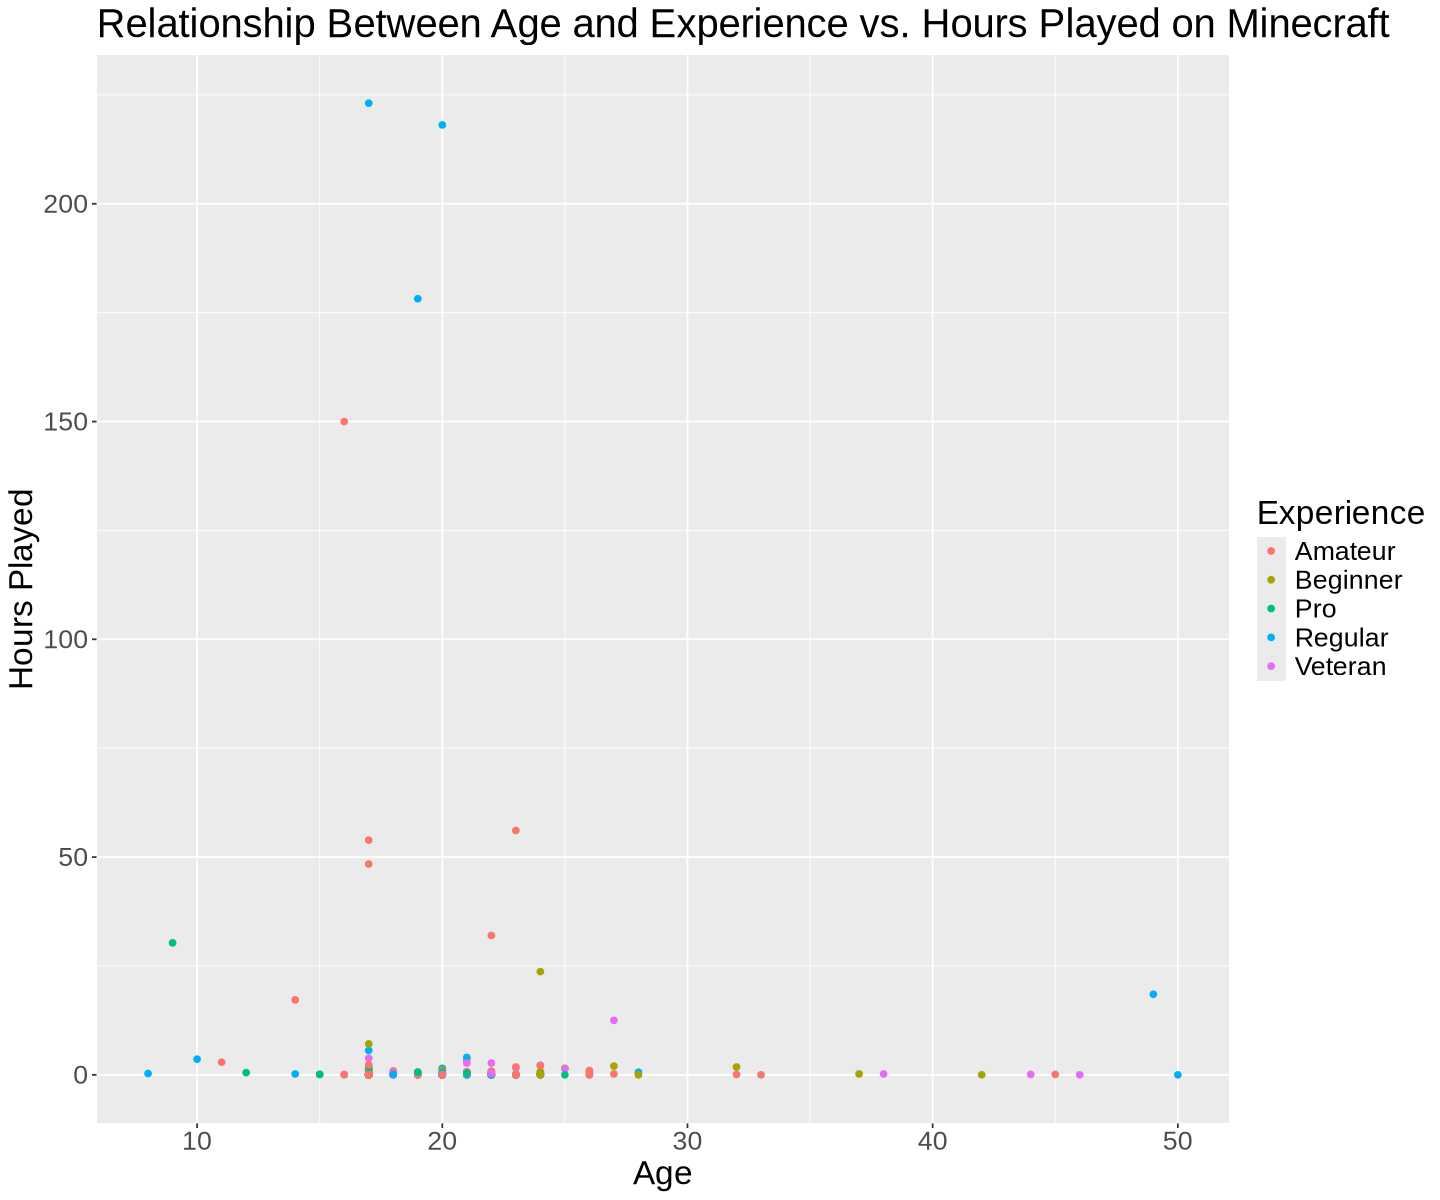

In [4]:
options(repr.plot.width=12, repr.plot.height=10)
mc_plot <- players |> ggplot(aes(x=age, y=played_hours, color=experience)) + geom_point() + labs(x="Age",y="Hours Played", color="Experience", title="Relationship Between Age and Experience vs. Hours Played on Minecraft") + theme(text=element_text(size=20))
mc_plot

In [5]:
set.seed(1)
mc_split <- initial_split(mc_data, prop = 0.75, strata = high_contributor)
mc_train <- training(mc_split)
mc_test <- testing(mc_split)

In [6]:
mc_recipe <- recipe(high_contributor ~ age + experience_num, data = mc_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

kkn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

In [7]:
mc_vfold <- vfold_cv(mc_train, v = 10, strata = high_contributor)

In [8]:
gridvals <- tibble(neighbors = seq(1, 20, by = 2))

In [9]:
knn_fit <- workflow() |>
  add_recipe(mc_recipe) |>
  add_model(kkn_tune) |>
  tune_grid(resamples = mc_vfold, grid = gridvals) |>
  collect_metrics()
knn_fit

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8080220,10,0.02600775,Preprocessor1_Model01
1,roc_auc,binary,0.5067308,10,0.03627589,Preprocessor1_Model01
3,accuracy,binary,0.8556410,10,0.01208562,Preprocessor1_Model02
3,roc_auc,binary,0.5092949,10,0.04740376,Preprocessor1_Model02
5,accuracy,binary,0.8694505,10,0.00612529,Preprocessor1_Model03
5,roc_auc,binary,0.3945513,10,0.05633179,Preprocessor1_Model03
7,accuracy,binary,0.8694505,10,0.00612529,Preprocessor1_Model04
7,roc_auc,binary,0.4681090,10,0.05815169,Preprocessor1_Model04
9,accuracy,binary,0.8694505,10,0.00612529,Preprocessor1_Model05


In [10]:
accuracies <- knn_fit |>
    filter(.metric=="accuracy")

best_k <- accuracies |> 
    arrange(desc(mean))|>
    head(1) |>
    pull(neighbors)
head(best_k)

[1] 5

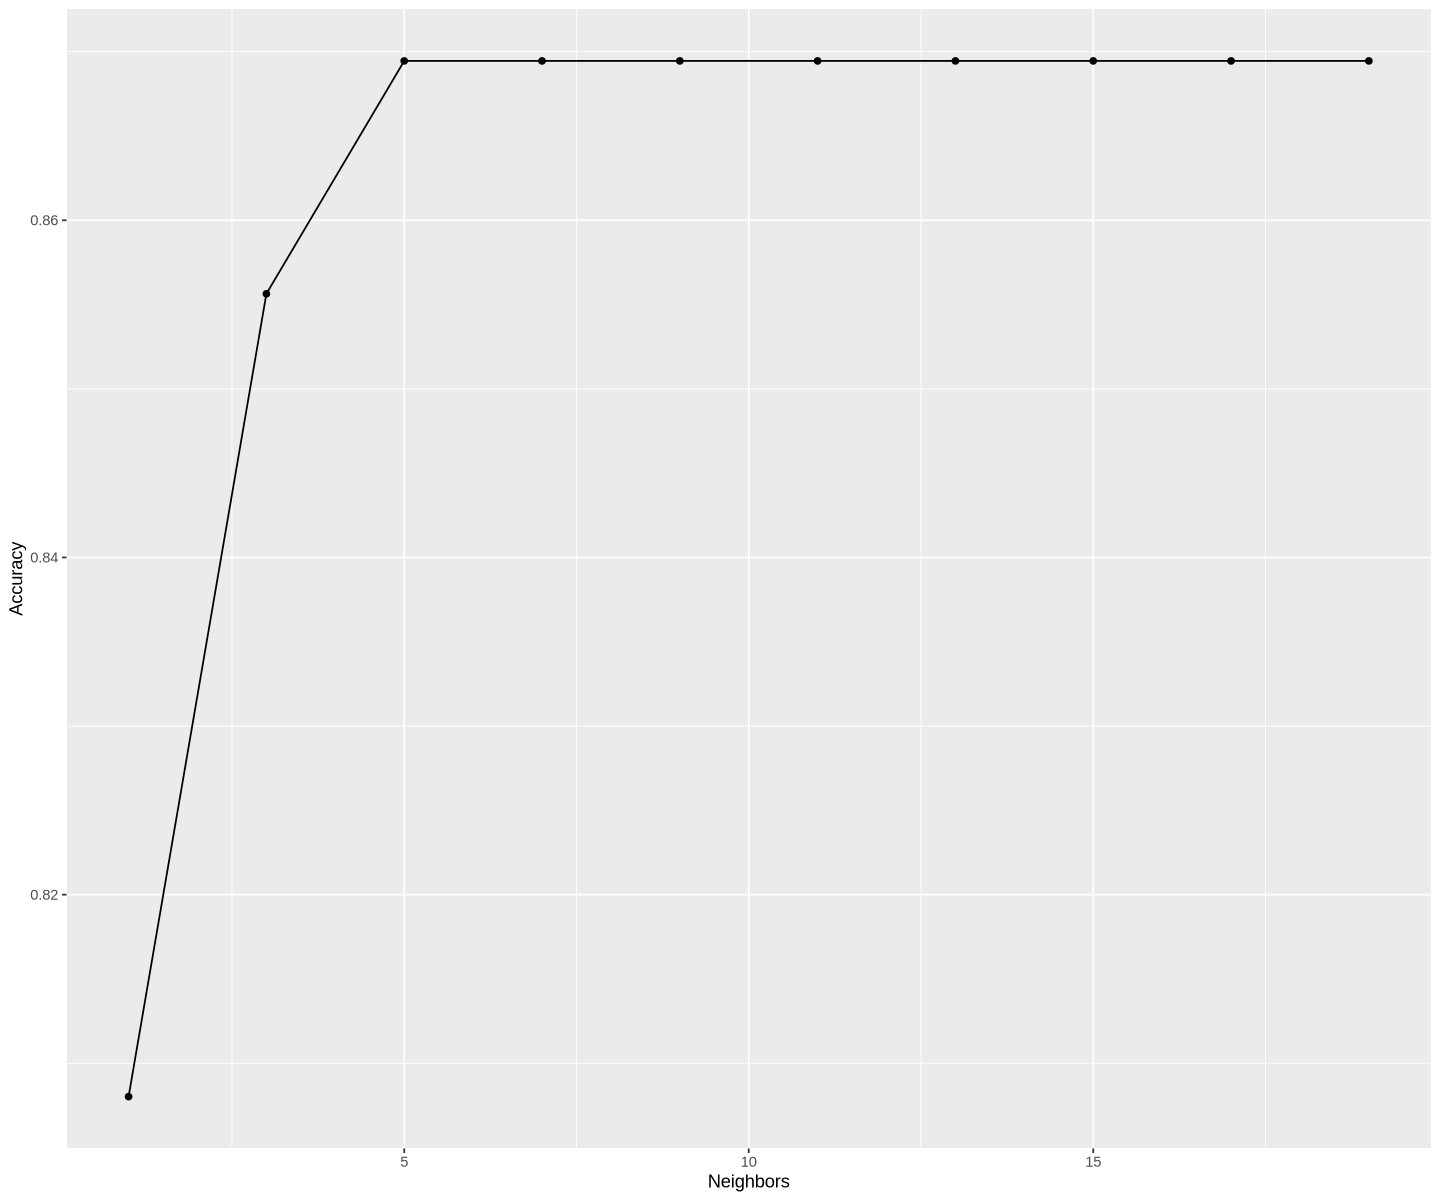

In [15]:
options(repr.plot.width=12, repr.plot.height=10)
accuracy_vs_k <- accuracies |> ggplot(aes(x=neighbors,y=mean))+geom_point()+geom_line()+labs(x="Neighbors",y="Accuracy")
accuracy_vs_k

In [12]:
player_recipe <- recipe(high_contributor ~ age + experience_num, data=mc_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

player_spec <- nearest_neighbor(weight_func="rectangular", neighbor=5) |>
    set_engine("kknn") |>
    set_mode("classification")

player_fit <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(player_spec) |>
    fit(data=mc_train)
player_fit

mc_prediction <- predict(player_fit, mc_test) |>
    bind_cols(mc_test)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1310345
Best kernel: rectangular
Best k: 5

In [13]:
contributor_test_prediction <- mc_prediction |>
    metrics(truth=high_contributor, estimate=.pred_class) |>
    filter(.metric=="accuracy")
contributor_test_prediction 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8571429


In [14]:
conf_mat <- mc_prediction |>
    conf_mat(truth=high_contributor, estimate=.pred_class)
conf_mat

          Truth
Prediction yes no
       yes   0  0
       no    7 42